# **✅ Project Title: Comparing Sales Performance Across Marketing Channels Using Kruskal-Wallis Test**

**Description**

This project applies the Kruskal-Wallis H-test, a non-parametric alternative to one-way ANOVA, to evaluate whether sales performance differs significantly across three different marketing channels—Email, Social Media, and TV Advertising. The synthetic dataset used simulates sales from non-normally distributed populations, making Kruskal-Wallis the appropriate choice.

## **1️⃣ Importing the Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, shapiro, probplot


## **2️⃣ Defining Business Scenario & Goal**

**Scenario:**
A marketing analyst wants to assess whether **sales revenue** varies significantly across three marketing channels—Email, Social Media, and TV. Due to skewed data distributions, a non-parametric approach is required.

**Goal:**
To test whether there is a **statistically significant difference in median sales revenue** across the three marketing strategies using the Kruskal-Wallis test.

## **3️⃣ Defining Hypotheses**

* **Null Hypothesis (H₀):** All groups have the same distribution (no difference in median sales across channels).

* **Alternative Hypothesis (H₁):** At least one group differs in distribution (sales medians are not all equal).

## **4️⃣ Data Generation (Synthetic)**

In [2]:
np.random.seed(42)

# Generate synthetic skewed sales revenue data for each channel
email_sales = np.random.gamma(shape=2, scale=120, size=50)
social_sales = np.random.gamma(shape=2, scale=110, size=50)
tv_sales = np.random.gamma(shape=2, scale=140, size=50)

# Create DataFrame for visualizations
df = pd.DataFrame({
    'sales': np.concatenate([email_sales, social_sales, tv_sales]),
    'channel': ['Email']*50 + ['Social']*50 + ['TV']*50
})
df.head()


,sales,channel
0,287.241527,Email
1,179.335768,Email
2,165.874030,Email
3,165.876275,Email
4,557.965729,Email


**Explanation:**

We simulate **non-normal (gamma-distributed)** sales data for 3 different marketing channels. Each group has 50 samples, with slightly different scales to simulate varying effects.

## **5️⃣ Visualization for Exploration**

<ipython-input-3-950ee8ea6d77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel', y='sales', data=df, palette='Set2')


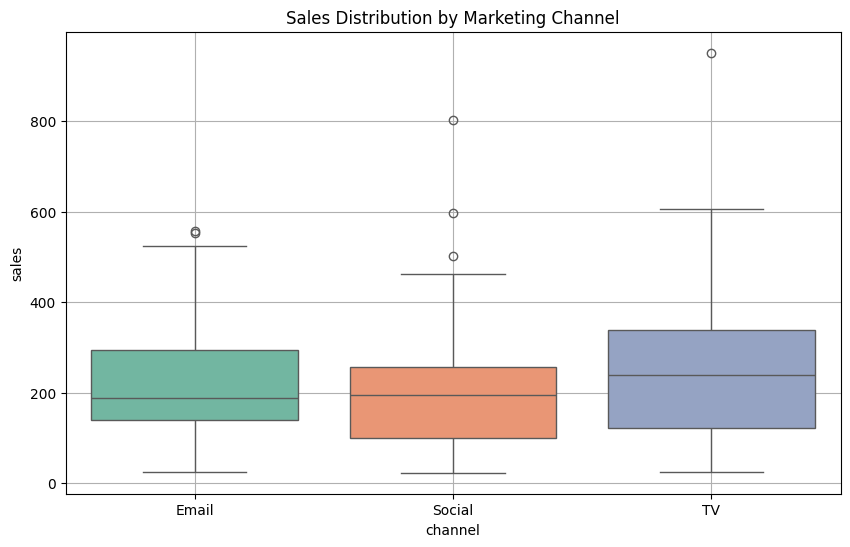

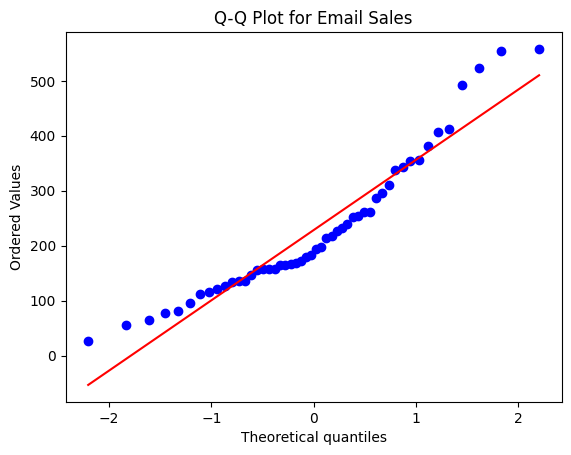

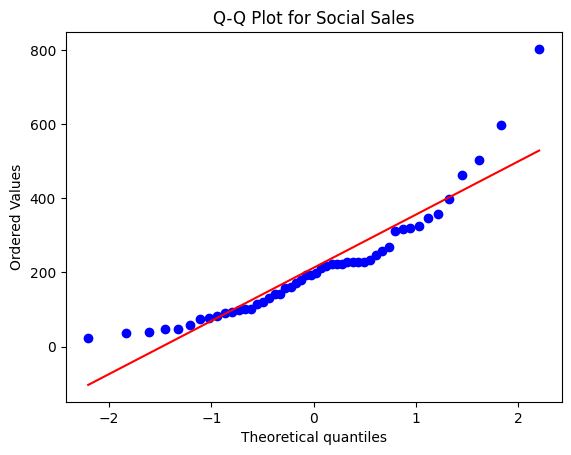

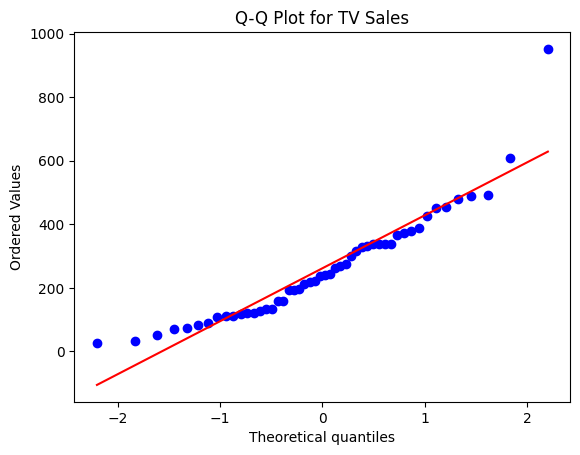

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel', y='sales', data=df, palette='Set2')
plt.title('Sales Distribution by Marketing Channel')
plt.grid(True)
plt.show()

# Q-Q Plots for each group
channels = ['Email', 'Social', 'TV']
for ch in channels:
    probplot(df[df['channel'] == ch]['sales'], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {ch} Sales")
    plt.show()


## **6️⃣ Assumption Checks – Normality (Shapiro-Wilk Test)**

In [4]:
for ch in channels:
    stat, p = shapiro(df[df['channel'] == ch]['sales'])
    print(f"{ch} Channel - Shapiro-Wilk p-value: {p:.4f}")


Email Channel - Shapiro-Wilk p-value: 0.0023
Social Channel - Shapiro-Wilk p-value: 0.0001
TV Channel - Shapiro-Wilk p-value: 0.0005


**Conclusion:**

All p-values < 0.05, indicating non-normal distributions → Kruskal-Wallis test is appropriate.

## **7️⃣ Kruskal-Wallis Test**

In [7]:
stat, p = kruskal(email_sales, social_sales, tv_sales)
print(f"Kruskal-Wallis Test: Statistic = {stat:.4f}, p-value = {p:.4f}")



Kruskal-Wallis Test: Statistic = 2.6024, p-value = 0.2722


## **8️⃣ Interpretation of Results**

In [8]:
alpha = 0.05
if p < alpha:
    conclusion = "✅ Reject the null hypothesis: At least one marketing channel leads to significantly different sales."
else:
    conclusion = "❌ Fail to reject the null hypothesis: No significant difference in sales across channels."

print(conclusion)


❌ Fail to reject the null hypothesis: No significant difference in sales across channels.


📌 **Summary:** Kruskal-Wallis Test Result

The **Kruskal-Wallis H-test** was conducted to determine whether there are significant differences in **sales revenue** among three marketing channels: **Email, Social Media**, and TV. Since the dataset did not follow a normal distribution (as verified by the Shapiro-Wilk test), the Kruskal-Wallis test, a **non-parametric alternative to ANOVA**, was appropriately used. The test yielded a **statistic of 2.6024 and a p-value of 0.2722**. Because the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**. This means there is **no statistically significant difference in the sales distributions** across the three marketing channels. In practical terms, based on this dataset,** none of the channels appear to outperform the others in terms of sales performance.**